# Ausreißer anhand Boxplot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
heartData = pd.read_csv("heart-failure-prediction/heart.csv")
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Entfernen unangegebener Cholersterin Beobachtungen und Frauen
heartData = heartData[(heartData["Sex"] != "F") & (heartData["Cholesterol"] != 0)]
heartData.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,53.102837,133.359929,241.040780,0.187943,138.040780,0.978191,0.560284
std,9.556603,16.842386,57.509194,0.391014,24.922903,1.096840,0.496793
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,206.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,234.000000,0.000000,139.500000,0.800000,1.000000
75%,59.000000,140.000000,272.250000,0.000000,156.000000,1.800000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,5.600000,1.000000


In [4]:
# Umwandlung der Spalte "Sex" in nummerischen Wert
heartData["Sex"] = heartData["Sex"].apply(lambda x: 0 if x == "M" else 1)

# Umwandlung der Spalte "ST_Slope" in nummerischen Wert
heartData["ST_Slope"] = heartData["ST_Slope"].apply(lambda x: 0 if x == "Flat" else (1 if x == "Up" else 2))

# Umwandlung der Spalte "ChestPainType" in nummerischen Wert
heartData["ChestPainType"] = heartData["ChestPainType"].apply(lambda x: 0 if x == "TA" else (1 if x == "ATA" else (2 if x == "NAP" else 3)))

# Umwandlung der Spalte "RestingECG" in nummerischen Wert
heartData["RestingECG"] = heartData["RestingECG"].apply(lambda x: 0 if x == "Normal" else (1 if x == "ST" else 2))

# Umwandlung der Spalte "ExerciseAngina" in nummerischen Wert
heartData["ExerciseAngina"] = heartData["ExerciseAngina"].apply(lambda x: 0 if x == "N" else 1)

heartData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,1,0
2,37,0,1,130,283,0,1,98,0,0.0,1,0
4,54,0,2,150,195,0,0,122,0,0.0,1,0
5,39,0,2,120,339,0,0,170,0,0.0,1,0
7,54,0,1,110,208,0,0,142,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
911,59,0,3,164,176,1,2,90,0,1.0,0,1
913,45,0,0,110,264,0,0,132,0,1.2,0,1
914,68,0,3,144,193,1,0,141,0,3.4,0,1
915,57,0,3,130,131,0,0,115,1,1.2,0,1


In [5]:
# Nummerische Attribute rausfiltern
numericFeatures = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
numericHeartData = heartData.loc[:,numericFeatures].copy()

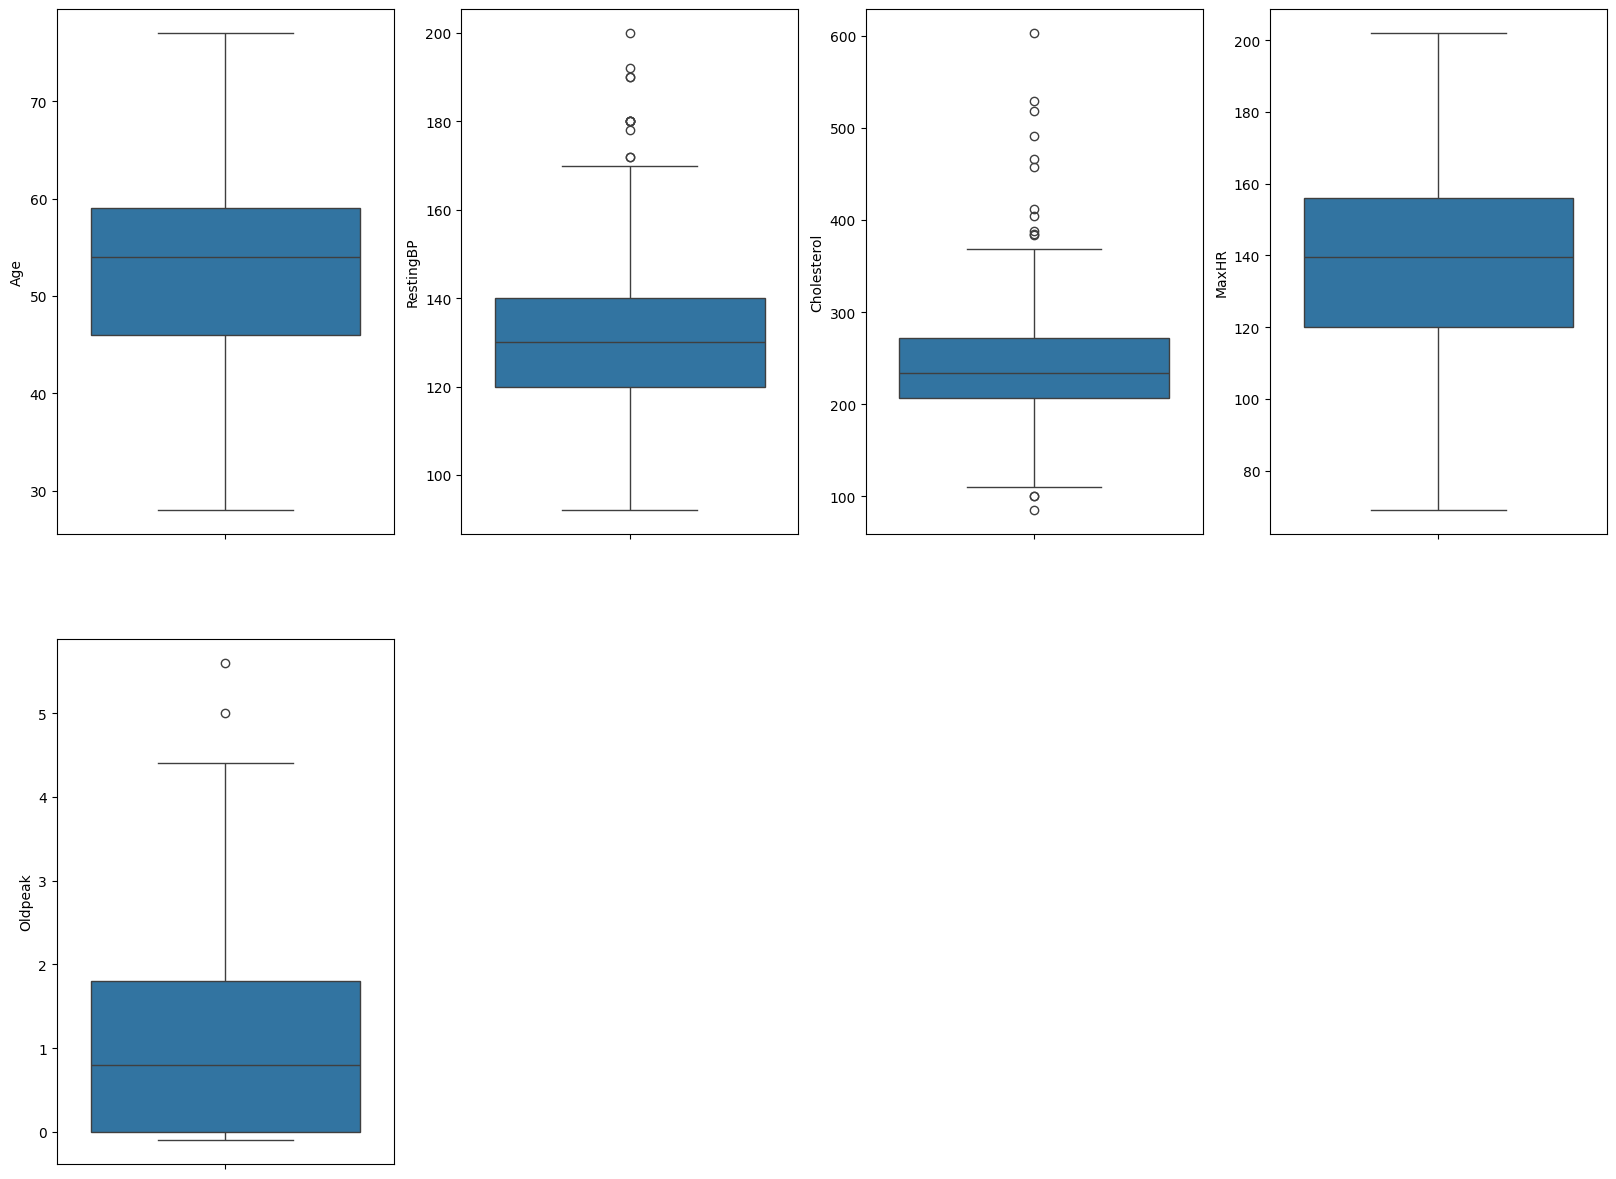

In [6]:
plt.figure(figsize=(20, 15))
for i in range(len(numericHeartData.columns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(numericHeartData[numericHeartData.columns[i]])
plt.savefig("Ausreisser.png")
plt.show()

## Ausreißer
Anhand der Boxplots kann man Ausreißer dei den Attributen: RestingBP, Cholesterol und Oldpeak erkennen.

In [7]:
numericHeartData.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,564.000000,564.000000,564.000000,564.000000,564.000000
mean,53.102837,133.359929,241.040780,138.040780,0.978191
std,9.556603,16.842386,57.509194,24.922903,1.096840
min,28.000000,92.000000,85.000000,69.000000,-0.100000
25%,46.000000,120.000000,206.750000,120.000000,0.000000
50%,54.000000,130.000000,234.000000,139.500000,0.800000
75%,59.000000,140.000000,272.250000,156.000000,1.800000
max,77.000000,200.000000,603.000000,202.000000,5.600000


## Normalverteilung

In [8]:
import scipy.stats as stats

#Shapiro-Wilk-Test für jede Spalte im DataFrame
def getNV(column):
    p_values = {}
    stat, p = stats.shapiro(numericHeartData[column])
    p_values[column] = p
    print(f'{column}: p-Wert={p:.3f}')
    if p > 0.05:
        print(f'{column} ist normalverteilt')
    else:
        print(f'{column} ist nicht normalverteilt')

getNV("Cholesterol")
getNV("RestingBP")

Cholesterol: p-Wert=0.000
Cholesterol ist nicht normalverteilt
RestingBP: p-Wert=0.000
RestingBP ist nicht normalverteilt


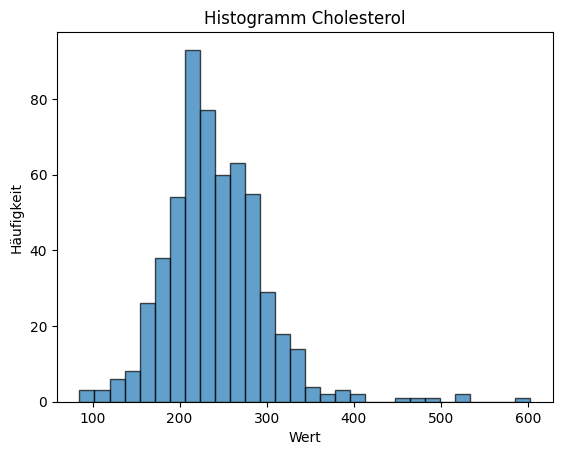

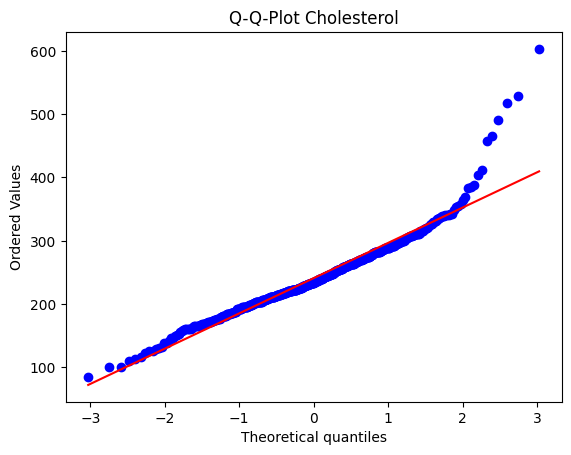

In [9]:
# Histogramm
plt.hist(numericHeartData["Cholesterol"], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogramm Cholesterol')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.savefig('PNG/Histogramm Cholesterol.png')
plt.show()

# Q-Q-Plot
stats.probplot(numericHeartData["Cholesterol"], dist="norm", plot=plt)
plt.title('Q-Q-Plot Cholesterol')
plt.savefig('PNG/Q-Q-Plot Cholesterol.png')
plt.show()

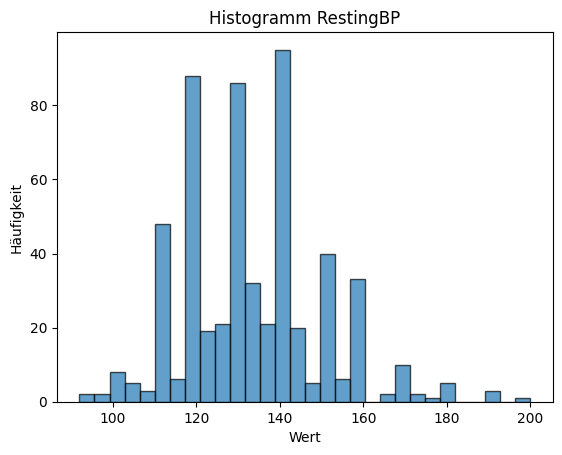

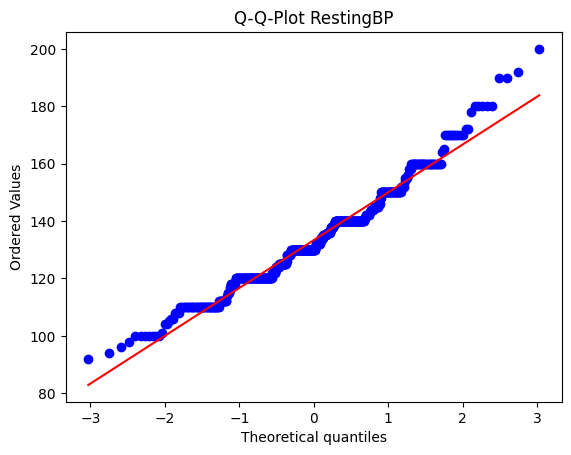

In [10]:
# Histogramm
plt.hist(numericHeartData["RestingBP"], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogramm RestingBP')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.savefig('PNG/Histogramm RestingBP.png')
plt.show()

# Q-Q-Plot
stats.probplot(numericHeartData["RestingBP"], dist="norm", plot=plt)
plt.title('Q-Q-Plot RestingBP')
plt.savefig('PNG/Q-Q-Plot RestingBP.png')
plt.show()

## Inter Quartile Range Method
Das Interquartile Range (IQR) Verfahren, auf Deutsch Interquartilsabstand genannt, ist eine statistische Methode zur Identifikation von Ausreißern in einem Datensatz.
[https://www.hackersrealm.net/post/detect-and-remove-outliers-python]

In [11]:
#Beispiel an Cholesterin
q1 = numericHeartData["Cholesterol"].quantile(0.25)
q3 = numericHeartData["Cholesterol"].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

print("upper_limit", str(upper_limit))
print("lower_limit", str(lower_limit))

# trimming - delete the outlier data
new_df = numericHeartData.loc[(numericHeartData["Cholesterol"] <= upper_limit) & (numericHeartData["Cholesterol"] >= lower_limit)]
print("before removing outliers:", len(numericHeartData))
print("after removing outliers:",len(new_df))
print("outliers:", len(numericHeartData)-len(new_df))

upper_limit 370.5
lower_limit 108.5
before removing outliers: 564
after removing outliers: 550
outliers: 14


## Entfernen anderer Ausreißer

In [12]:
numericHeartData = new_df.copy()

# Entfernen von RestingBP
q1 = numericHeartData["RestingBP"].quantile(0.25)
q3 = numericHeartData["RestingBP"].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

print("upper_limit RestingBP", str(upper_limit))
print("lower_limit RestingBP", str(lower_limit))

# trimming - delete the outlier data
new_df = numericHeartData.loc[(numericHeartData["RestingBP"] <= upper_limit) & (numericHeartData["RestingBP"] >= lower_limit)]
print("before removing outliers RestingBP:", len(numericHeartData))
print("after removing outliers RestingBP:",len(new_df))
print("outliers RestingBP:", len(numericHeartData)-len(new_df))
numericHeartData = new_df.copy()

upper_limit RestingBP 170.0
lower_limit RestingBP 90.0
before removing outliers RestingBP: 550
after removing outliers RestingBP: 538
outliers RestingBP: 12


In [13]:
# Entfernen von Oldpeak
q1 = numericHeartData["Oldpeak"].quantile(0.25)
q3 = numericHeartData["Oldpeak"].quantile(0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

print("upper_limit Oldpeak", str(upper_limit))
print("lower_limit Oldpeak", str(lower_limit))

# trimming - delete the outlier data
new_df = numericHeartData.loc[(numericHeartData["Oldpeak"] <= upper_limit) & (numericHeartData["Oldpeak"] >= lower_limit)]
print("before removing outliers Oldpeak:", len(numericHeartData))
print("after removing outliers Oldpeak:",len(new_df))
print("outliers Oldpeak:", len(numericHeartData)-len(new_df))
numericHeartData = new_df.copy()

upper_limit Oldpeak 4.5
lower_limit Oldpeak -2.7
before removing outliers Oldpeak: 538
after removing outliers Oldpeak: 536
outliers Oldpeak: 2


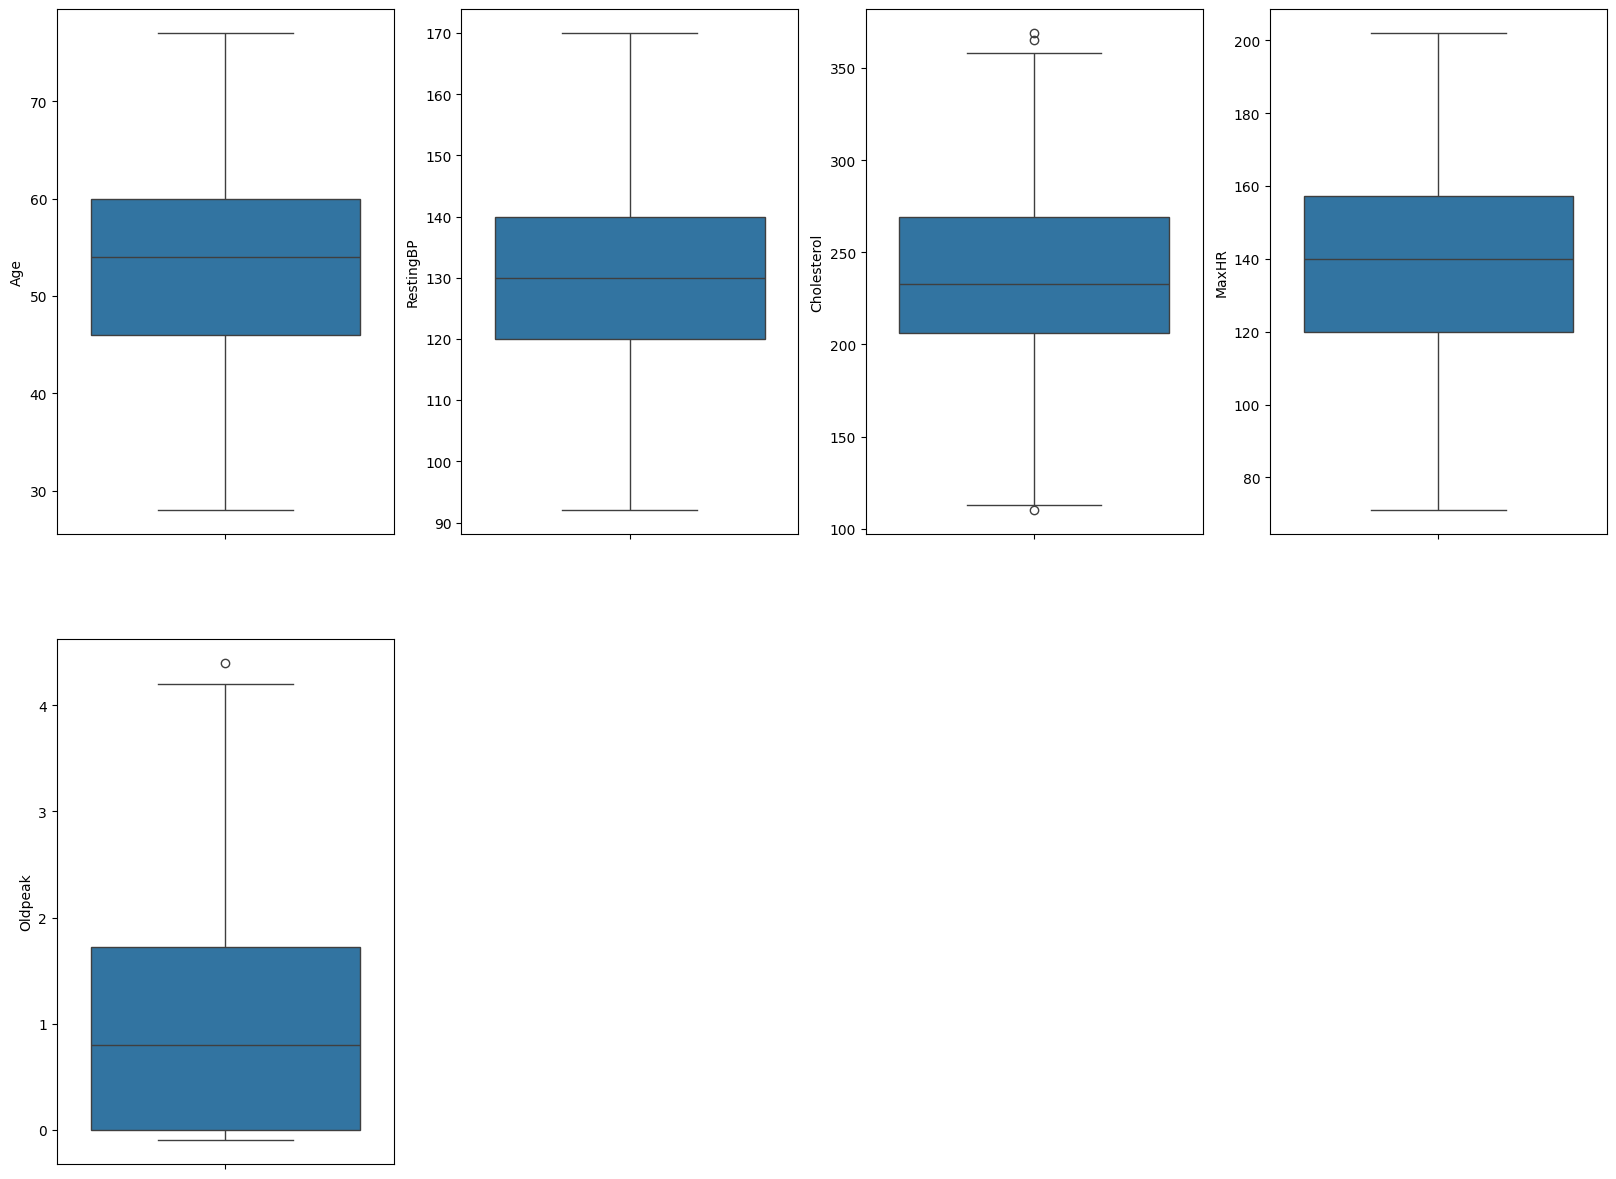

In [14]:
plt.figure(figsize=(20, 15))
for i in range(len(numericHeartData.columns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(numericHeartData[numericHeartData.columns[i]])
plt.savefig("Ausreisser.png")
plt.show()